# Predicting Loan Repayments with Decision Trees and Random Forest
### Jessica Campbell

We will create a model to predict whether a lender who borrowed money is likely to repay their loan using decision trees and random forest.

## Import Libraries

In [1]:
# math and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

## Data

We will use publicly available data from [LendingClub.com](www.lendingclub.com), which connects people who need money (borrowers) with people who have money (investors). 

This loan data set contains the following features:
* credit.policy: whether the customer meets the credit criteria
* purpose: the purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other")
* int.rate: the interest rate of the loan; borrowers deemed more risky are assigned higher interest rates
* installment: monthly installments owed by the borrower if the loan is funded
* log.annual.inc: natural log of the self-reported annual income of the borrower
* dti: debt-to-income ratio of the borrower
* fico: FICO credit score of the borrower
* days.with.cr.line: number of days the borrower has had a credit line
* revol.bal: borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)
* revol.util: borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)
* inq.last.6mths: borrower's number of inquiries by creditors in the last 6 months
* delinq.2yrs: number of times the borrower has been 30+ days past due on a payment in the past 2 years
* pub.rec: borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)

In [2]:
loans = pd.read_csv('loan_data.csv')

**Check the header, info, and summary statistics.**

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

**Use a pair plot to visualize the entire data set and us ehue to segment the data based on whether the lender paid back their loan.**

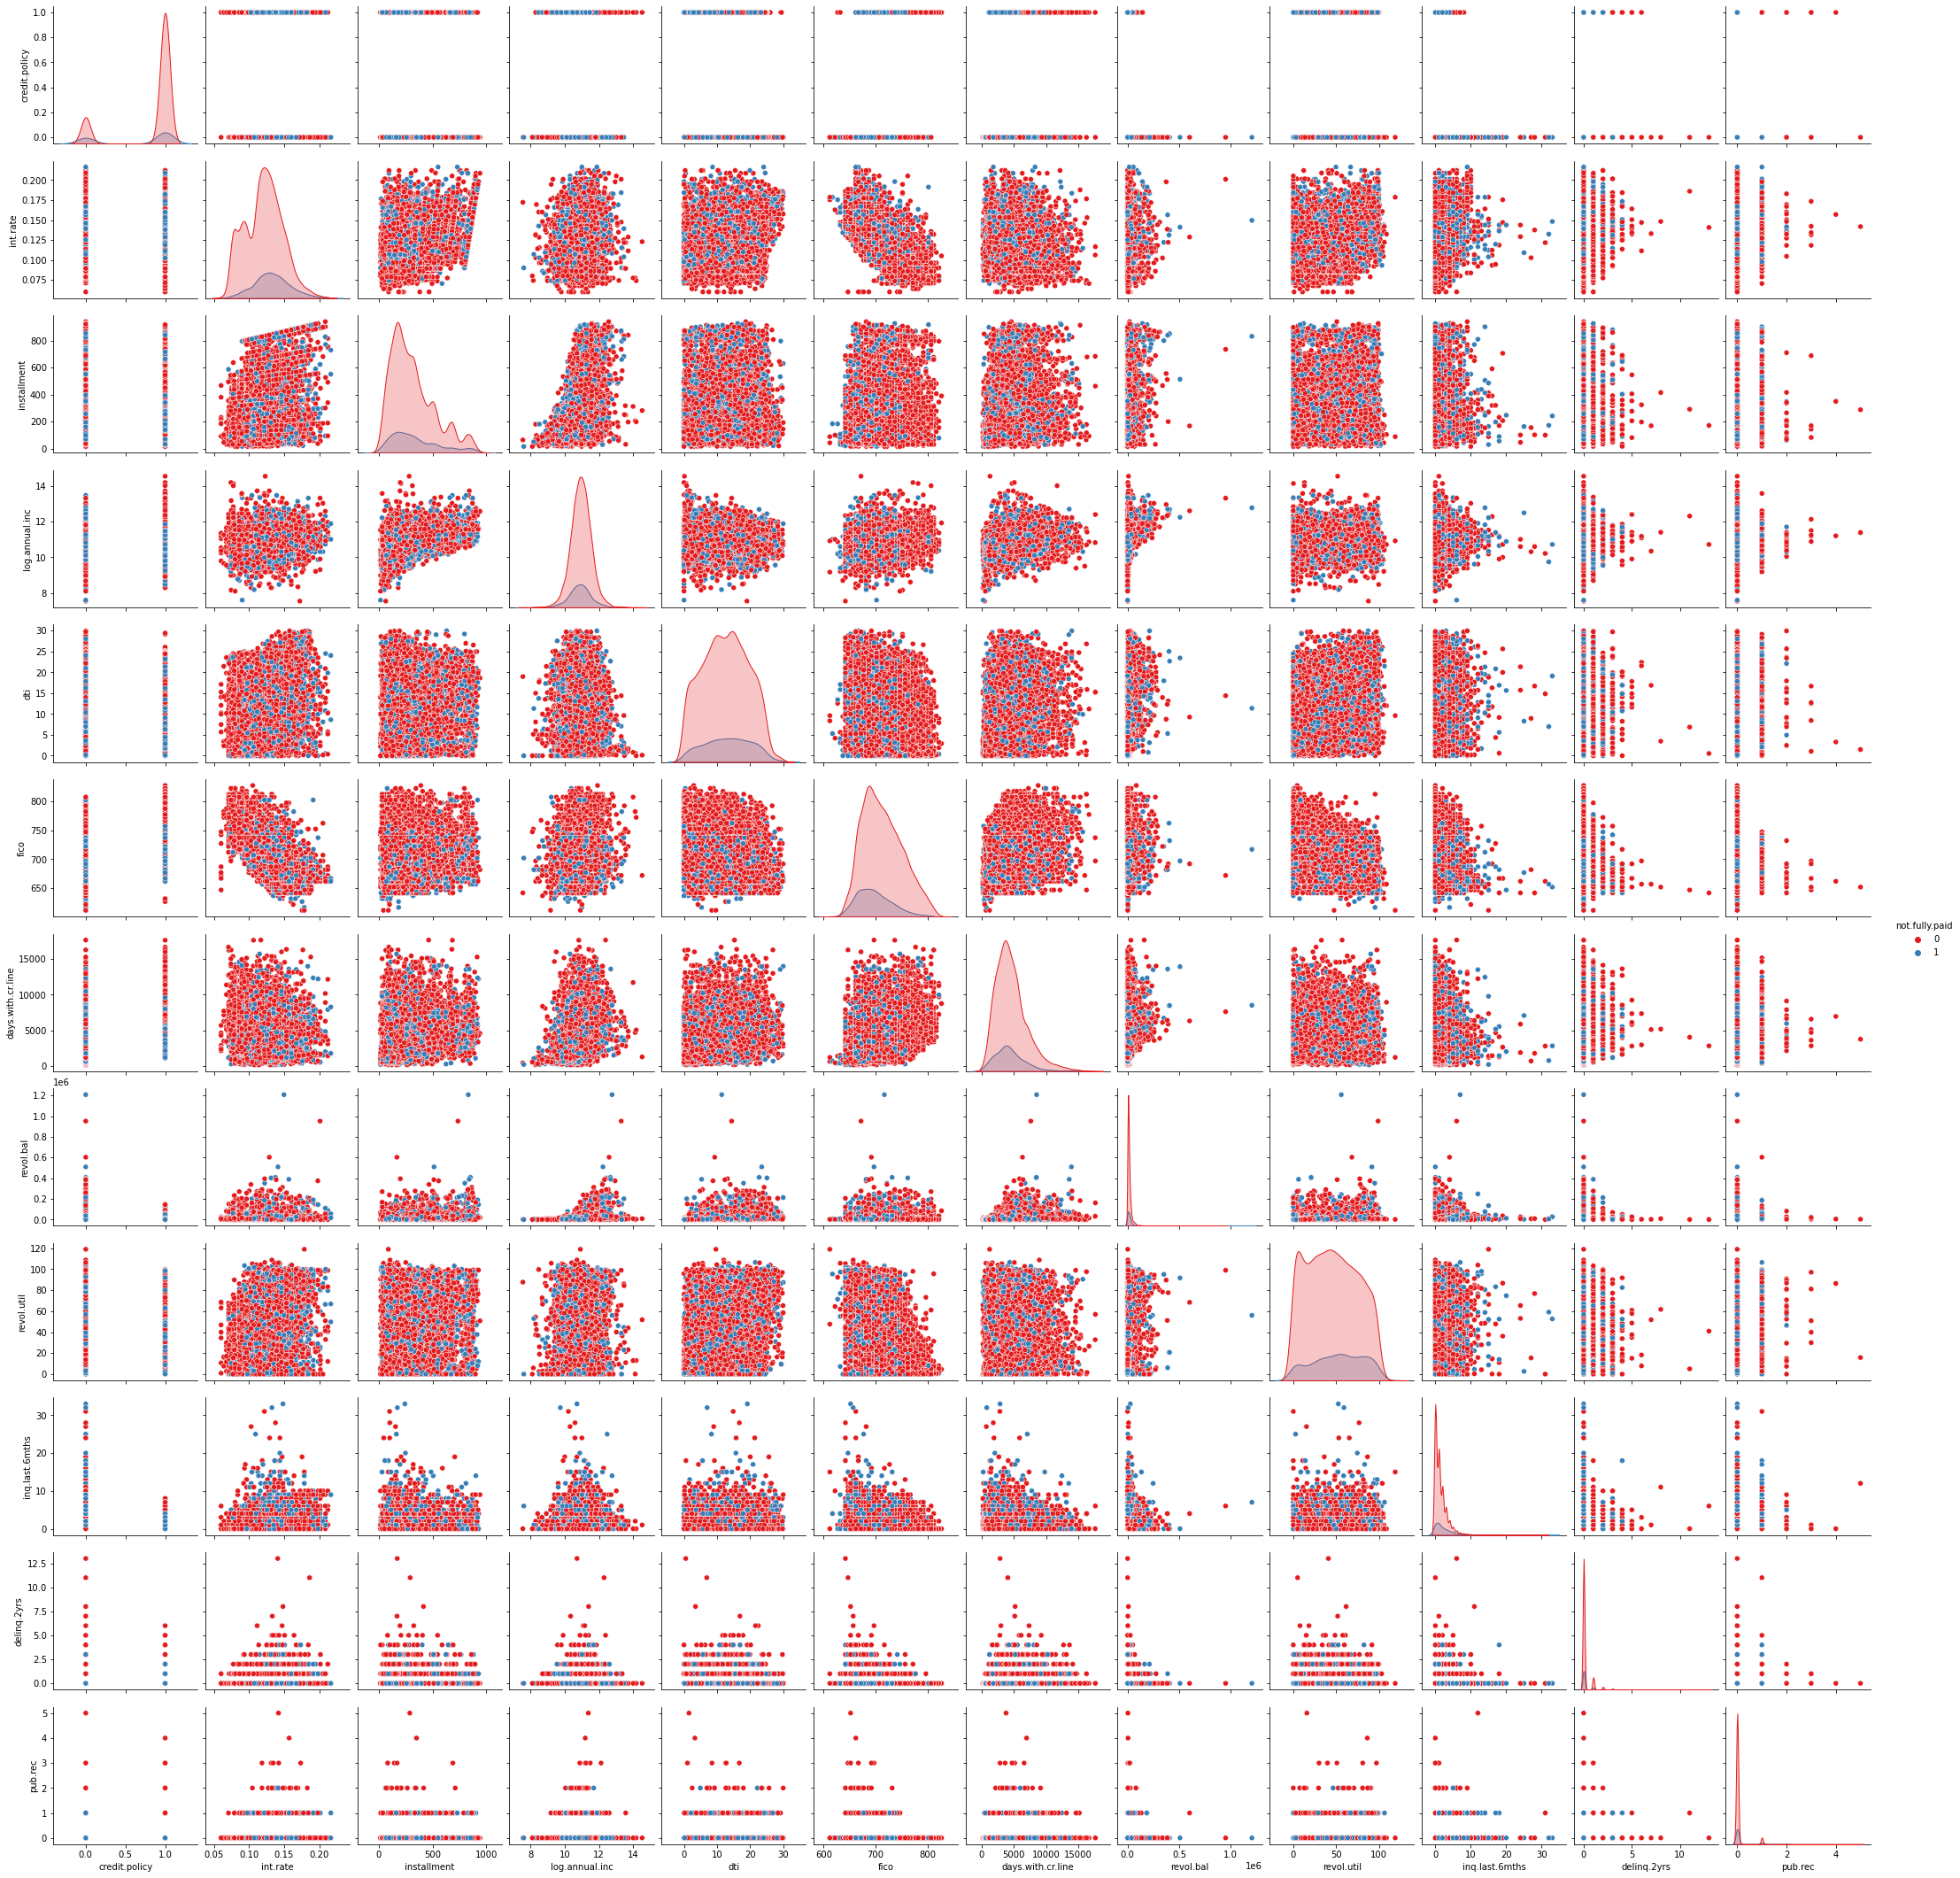

In [6]:
sns.pairplot(data=loans,hue='not.fully.paid',palette='Set1')

**Use a histogram to visualize the two FICO distributions on top of each other, one for each credit.policy outcome.**

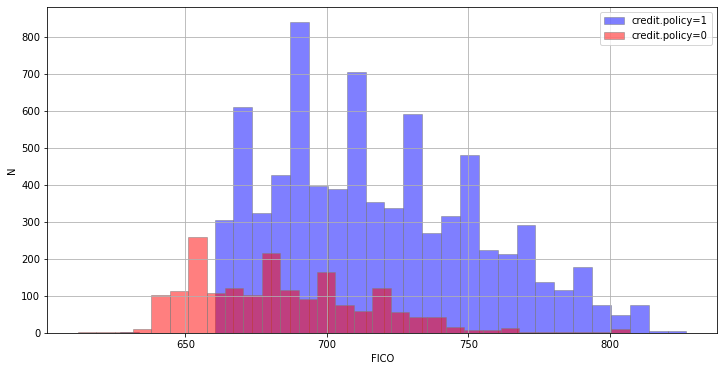

In [7]:
fig = plt.figure(figsize=(12,6))
loans['fico'][loans['credit.policy']==1].hist(bins=30,label='credit.policy=1',color='blue',edgecolor='grey',alpha=0.5)
loans['fico'][loans['credit.policy']==0].hist(bins=30,label='credit.policy=0',color='red',edgecolor='grey',alpha=0.5)
plt.xlabel('FICO')
plt.ylabel('N')
plt.legend()

**Use a histogram to visualize the two FICO distributions on top of each other, one for each not.fully.paid outcome.**

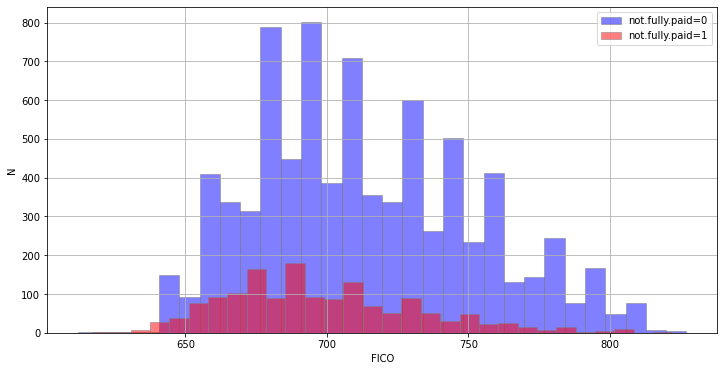

In [8]:
fig = plt.figure(figsize=(12,6))
loans['fico'][loans['not.fully.paid']==0].hist(bins=30,color='blue',edgecolor='grey',alpha=0.5,label='not.fully.paid=0')
loans['fico'][loans['not.fully.paid']==1].hist(bins=30,color='red',edgecolor='grey',alpha=0.5,label='not.fully.paid=1')
plt.xlabel('FICO')
plt.ylabel('N')
plt.legend()

**Use a countplot to visualize the counts of loans by purpose, using hue to segnent the data by the not.fully.paid. column.**

<AxesSubplot:xlabel='purpose', ylabel='count'>

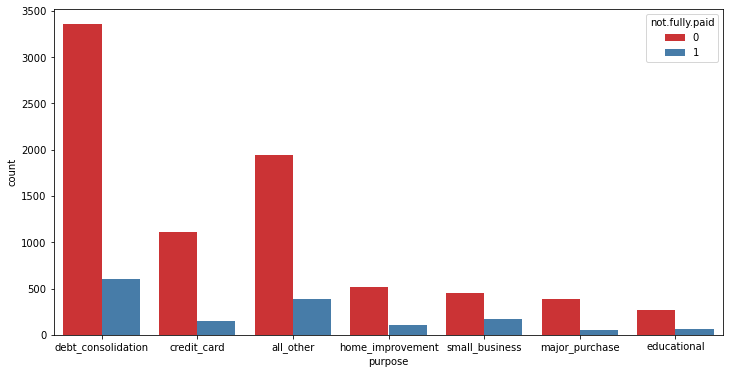

In [9]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data=loans,x='purpose',hue='not.fully.paid',palette='Set1')

**Use a joint plot to investigate the trend between FICO score and interest rate.**

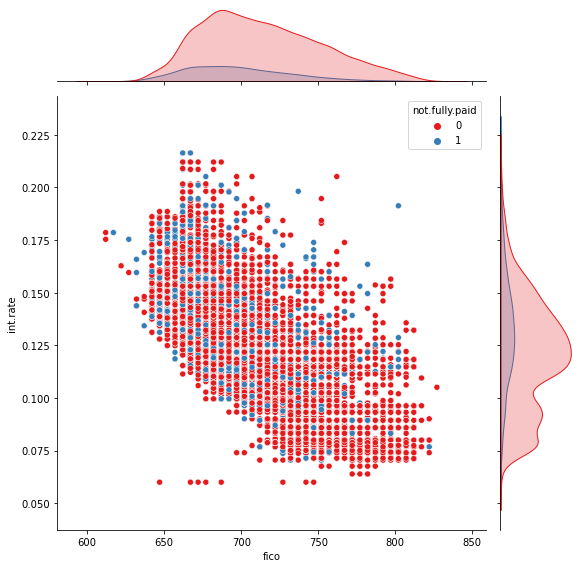

In [10]:
sns.jointplot(data=loans,x='fico',y='int.rate',hue='not.fully.paid',palette='Set1',height=8)

**Use a linear model to visualize the trend between interest rate and FICO score comparing those who did and did not pay back their loans.**

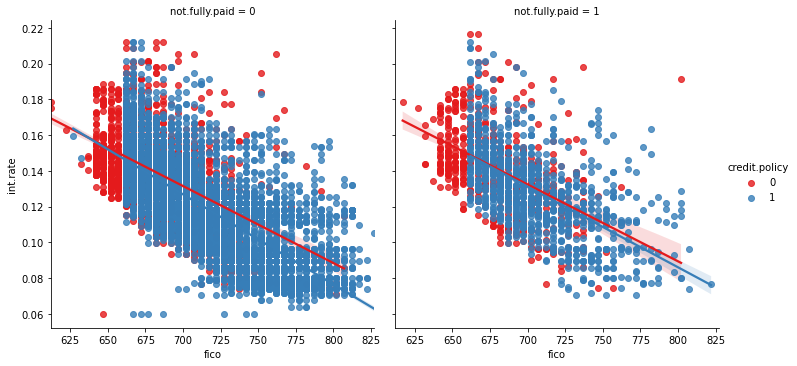

In [11]:
sns.lmplot(data=loans,x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',palette='Set1')

# Building the Decision Tree Model

We need to split the data into a training and testing set. Let's take a look at the header again to see what columns and data types we're working with.

In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Notice that the purpose column is categorical, so we will need to transform this using a dummy variable. 

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [13]:
loans_final = pd.get_dummies(data=loans,columns=['purpose'],drop_first=True)

In [14]:
loans_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


**Split the data into a training set and testing set.**

In [15]:
X = loans_final.drop('not.fully.paid',axis=1)
y = loans_final['not.fully.paid']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train the decision tree model using the training set.**

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation
**Predictions values using the testing data.**

In [18]:
y_predictions_dtree = dtree.predict(X_test)

**Check confusion matrix and classification report for the model.**

In [19]:
print(confusion_matrix(y_test,y_predictions_dtree))

[[1988  443]
 [ 332  111]]


In [20]:
print(classification_report(y_test,y_predictions_dtree))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.25      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.73      0.74      2874



# Building the Random Forest Model

Use the training data from the decision tree model to train a random forest model.

In [21]:
rf = RandomForestClassifier(n_estimators=1)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1)

## Predictions and Evaluation

**Predict values using the testing data.**

In [22]:
y_predictions_rf = rf.predict(X_test)

**Check confusion matrix and classification report for the random forest model.**

In [23]:
print(confusion_matrix(y_test,y_predictions_rf))

[[2036  395]
 [ 338  105]]


In [24]:
print(classification_report(y_test,y_predictions_rf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2431
           1       0.21      0.24      0.22       443

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.54      2874
weighted avg       0.76      0.74      0.75      2874



Notice that the random forest slightly out-performed the decision tree model.

# Choosing n_values

We will create a for loop that trains random forest models with a range of n_values and analyze the accuracy score of our models to find an optimal value.

In [25]:
n_values        = np.arange(1,100)
accuracy_scores = []

for n in n_values:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train,y_train)
    y_predictions_rf = rf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_predictions_rf))

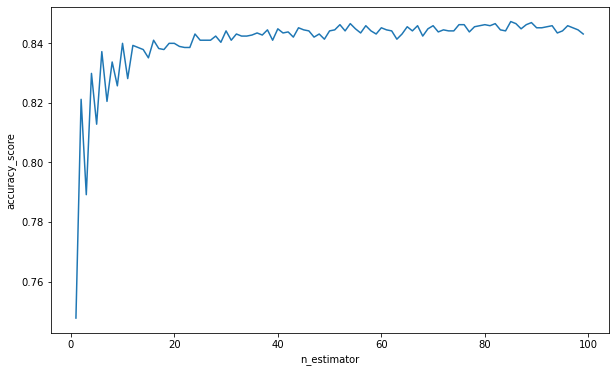

In [26]:
fig = plt.figure(figsize=(10,6))
plt.plot(n_values,accuracy_scores)
plt.xlabel('n_estimator')
plt.ylabel('accuracy_score')
plt.show()

Looking at the plot above, we can see that the value of n_estimator=20 is a resonable value to choose that optimizes the accuracy score of the random forest model.

## Retrain with Optimized K Value

We will re-train a random forest model with the optimal value of n_estimator that we found above using the same training data as before.

In [27]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)
y_predictions_rf = rf.predict(X_test)

**Check confusion matrix and classification report for the optimized random forest model.**

In [28]:
print(confusion_matrix(y_test,y_predictions_rf))

[[2407   24]
 [ 423   20]]


In [29]:
print(classification_report(y_test,y_predictions_rf))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.45      0.05      0.08       443

    accuracy                           0.84      2874
   macro avg       0.65      0.52      0.50      2874
weighted avg       0.79      0.84      0.79      2874



Notice that this random forest model out-performed the previous one!